# Using meta-research to improve science - 2020
## Studying methodological citations
### Prevalence anaylysis

#### Loading Data
As a first step we load the consesus data of study 2 - prevalence

##### Imports

In [218]:
import pandas as pd
import numpy as np
from pathlib import Path
import sys

import matplotlib
from matplotlib import colors
from matplotlib import pyplot as plt

matplotlib.rc('font', family='sans-serif') 
matplotlib.rc('font', serif='Arial') 

%matplotlib inline

##### Data loading

In [219]:
data_path = Path().home() / 'MetaScience'

data_file = 'dataset_all_fields.csv'
df = pd.read_csv((data_path / data_file).open('rb'), sep = ';', encoding=r'ISO-8859-1',usecols=lambda x: 'Unnamed' not in x, index_col=[5,6,10,0], na_values=['\xa0','\xCA'], engine='python')
df.dropna(how="all", inplace=True)

replace_journal_names = {l1:l2 for l1, l2 in zip(df.index.get_level_values(2),df.index.get_level_values(2).str.split().str.get(0))}
df = df.rename(replace_journal_names)

df.replace({"7,1": 7.1, "7,2":7.2}, inplace=True)

df.head()

title  \
field   journal      authors key                                                           
biology Astrobiology White   32125196  Simulating Serpentinization as It Could Apply ...   
                     Yingst  32023426  Is a Linear or a Walkabout Protocol More Effic...   
        Biology      Arisan  32182839  Upregulated Wnt-11 and miR-21 Expression Trigg...   
                     Fanfone 32183292  Molecular Imaging of Galectin-1 Expression as ...   
                     Glazier 32106435  Effects of Fish Predators on the Mass-Related ...   

                                       year month  day  volume  issue  \
field   journal      authors key                                        
biology Astrobiology White   32125196  2020     3  NaN    20.0    3.0   
                     Yingst  32023426  2020     3  NaN    20.0    3.0   
        Biology      Arisan  32182839  2020     3    9     9.0    3.0   
                     Fanfone 32183292  2020     3   14     9.0    3.0   
                     Glazier 32106435  2020     2   25     9.0    3.0   

                                         pages  \
field   journal      authors key                 
biology Astrobiology White   32125196  307-326   
                     Yingst  32023426  327-348   
        Biology      Arisan  32182839      NaN   
                     Fanfone 32183292      NaN   
                     Glazier 32106435      NaN   

                                                                             url  \
field   journal      authors key                                                   
biology Astrobiology White   32125196  https://pubmed.ncbi.nlm.nih.gov/32125196/   
                     Yingst  32023426  https://pubmed.ncbi.nlm.nih.gov/32023426/   
        Biology      Arisan  32182839  https://pubmed.ncbi.nlm.nih.gov/32182839/   
                     Fanfone 32183292  https://pubmed.ncbi.nlm.nih.gov/32183292/   
                     Glazier 32106435  https://pubmed.ncbi.nlm.nih.gov/32106435/   

                                        pubmed_id      pmc_id  ...  cit_434  \
field   journal      authors key                               ...            
biology Astrobiology White   32125196  32125196.0         NaN  ...      NaN   
                     Yingst  32023426  32023426.0  PMC7071088  ...      NaN   
        Biology      Arisan  32182839  32182839.0  PMC7150874  ...      NaN   
                     Fanfone 32183292  32183292.0  PMC7150867  ...      NaN   
                     Glazier 32106435  32106435.0  PMC7150980  ...      NaN   

                                       cit_435  cit_436 cit_437 cit_438  \
field   journal      authors key                                          
biology Astrobiology White   32125196      NaN      NaN     NaN     NaN   
                     Yingst  32023426      NaN      NaN     NaN     NaN   
        Biology      Arisan  32182839      NaN      NaN     NaN     NaN   
                     Fanfone 32183292      NaN      NaN     NaN     NaN   
                     Glazier 32106435      NaN      NaN     NaN     NaN   

                                      cit_439 cit_440 cit_441 cit_442 cit_443  
field   journal      authors key                                               
biology Astrobiology White   32125196     NaN     NaN     NaN     NaN     NaN  
                     Yingst  32023426     NaN     NaN     NaN     NaN     NaN  
        Biology      Arisan  32182839     NaN     NaN     NaN     NaN     NaN  
                     Fanfone 32183292     NaN     NaN     NaN     NaN     NaN  
                     Glazier 32106435     NaN     NaN     NaN     NaN     NaN  

[5 rows x 457 columns]

In [220]:
new_cols = []
skip_cols = 0
names = ['MethCit{}', 'Cit{}_Reason', 'Cit{}_SC']
for c in df.columns:
    if not 'cit' in c:
        new_cols.append(c)
        skip_cols += 1
    else:
        num = ''.join(filter(str.isdigit, c))
        if num:
            num = int(num)
            name = names[num%3-1].format(num//3+1)
            new_cols.append(name)
df.columns = new_cols
df.head()

title  \
field   journal      authors key                                                           
biology Astrobiology White   32125196  Simulating Serpentinization as It Could Apply ...   
                     Yingst  32023426  Is a Linear or a Walkabout Protocol More Effic...   
        Biology      Arisan  32182839  Upregulated Wnt-11 and miR-21 Expression Trigg...   
                     Fanfone 32183292  Molecular Imaging of Galectin-1 Expression as ...   
                     Glazier 32106435  Effects of Fish Predators on the Mass-Related ...   

                                       year month  day  volume  issue  \
field   journal      authors key                                        
biology Astrobiology White   32125196  2020     3  NaN    20.0    3.0   
                     Yingst  32023426  2020     3  NaN    20.0    3.0   
        Biology      Arisan  32182839  2020     3    9     9.0    3.0   
                     Fanfone 32183292  2020     3   14     9.0    3.0   
                     Glazier 32106435  2020     2   25     9.0    3.0   

                                         pages  \
field   journal      authors key                 
biology Astrobiology White   32125196  307-326   
                     Yingst  32023426  327-348   
        Biology      Arisan  32182839      NaN   
                     Fanfone 32183292      NaN   
                     Glazier 32106435      NaN   

                                                                             url  \
field   journal      authors key                                                   
biology Astrobiology White   32125196  https://pubmed.ncbi.nlm.nih.gov/32125196/   
                     Yingst  32023426  https://pubmed.ncbi.nlm.nih.gov/32023426/   
        Biology      Arisan  32182839  https://pubmed.ncbi.nlm.nih.gov/32182839/   
                     Fanfone 32183292  https://pubmed.ncbi.nlm.nih.gov/32183292/   
                     Glazier 32106435  https://pubmed.ncbi.nlm.nih.gov/32106435/   

                                        pubmed_id      pmc_id  ...  \
field   journal      authors key                               ...   
biology Astrobiology White   32125196  32125196.0         NaN  ...   
                     Yingst  32023426  32023426.0  PMC7071088  ...   
        Biology      Arisan  32182839  32182839.0  PMC7150874  ...   
                     Fanfone 32183292  32183292.0  PMC7150867  ...   
                     Glazier 32106435  32106435.0  PMC7150980  ...   

                                       Cit145_Reason  Cit146_SC  MethCit146  \
field   journal      authors key                                              
biology Astrobiology White   32125196            NaN        NaN         NaN   
                     Yingst  32023426            NaN        NaN         NaN   
        Biology      Arisan  32182839            NaN        NaN         NaN   
                     Fanfone 32183292            NaN        NaN         NaN   
                     Glazier 32106435            NaN        NaN         NaN   

                                      Cit146_Reason Cit147_SC MethCit147  \
field   journal      authors key                                           
biology Astrobiology White   32125196           NaN       NaN        NaN   
                     Yingst  32023426           NaN       NaN        NaN   
        Biology      Arisan  32182839           NaN       NaN        NaN   
                     Fanfone 32183292           NaN       NaN        NaN   
                     Glazier 32106435           NaN       NaN        NaN   

                                      Cit147_Reason Cit148_SC MethCit148  \
field   journal      authors key                                           
biology Astrobiology White   32125196           NaN       NaN        NaN   
                     Yingst  32023426           NaN       NaN        NaN   
        Biology      Arisan  32182839           NaN       NaN        NaN   
                     Fanfone

In [222]:
from IPython.core.debugger import set_trace
def is_float(val):
        try:
            float(val)
        except:
            return False
        else:
            return True

def to_numeric(x):
    numerics = np.vectorize(is_float, otypes = [bool])(x)
    if not all(numerics):
        print(x[~numerics], x.shape)
        return x.index
    
indices = df.filter(regex='Reason').apply(to_numeric,axis=1)
# df.loc[:,'Is_cov':'Methods_repo'].apply(to_numeric,axis=0)

Cit33_Reason    If a mean value was outside the 95% CI of anot...
Name: (biology, Biology, Glazier, 32106435), dtype: object (148,)
Cit11_Reason    possible
Cit12_Reason    probable
Cit13_Reason    possible
Cit14_Reason        none
Cit15_Reason        none
Cit16_Reason        none
Cit18_Reason    probable
Name: (biology, eLife, Jain, 32155117), dtype: object (148,)
Cit7_Reason     Transgenic mouse founders were generated by mi...
Cit8_Reason        using anti-PrP monoclonal antibody (mAb) D1854
Cit9_Reason     The presence of ten different TSE-associated c...
Cit10_Reason    Immunohistochemistry for detection of PrPres w...
Name: (biology, FASEB journal : official publication of the Federation of American Societies for           Experimental Biology, Vidal, 31944411), dtype: object (148,)
Cit5_Reason     probable
Cit6_Reason     probable
Cit18_Reason    probable
Cit20_Reason    probable
Cit24_Reason    probable
Name: (biology, Philosophical transactions of the Royal Society of London. 

In [111]:
# #drop Muley until fixed
# neuro_df = neuro_df.drop(('Progress in neurobiology','Muley'))
#safe dataframe
df.to_pickle(data_path / 'df_all.pkl')

##### Preprocessing

In [129]:
# Count citations per row
def get_last_citation(x):
    last = x.filter(regex='MethCit').last_valid_index()
    if last:
        print(last)
        num = ''.join(filter(str.isdigit, last))
        if num == '':
            return 0
        return int(num)
    return 0
    
df['num_citations'] = df.apply(get_last_citation, axis=1)

MethCit12
MethCit12
MethCit3
MethCit11
MethCit32
MethCit8
MethCit7
MethCit3
MethCit10
MethCit10
MethCit5
MethCit8
MethCit8
MethCit3
MethCit4
MethCit4
MethCit57
MethCit3
MethCit5
MethCit8
MethCit6
MethCit36
MethCit1
MethCit6
MethCit12
MethCit6
MethCit8
MethCit14
MethCit27
MethCit35
MethCit6
MethCit10
MethCit6
MethCit23
MethCit6
MethCit26
MethCit13
MethCit6
MethCit11
MethCit8
MethCit5
MethCit13
MethCit30
MethCit35
MethCit7
MethCit9
MethCit1
MethCit9
MethCit12
MethCit16
MethCit5
MethCit14
MethCit9
MethCit24
MethCit24
MethCit8
MethCit2
MethCit10
MethCit22
MethCit11
MethCit13
MethCit30
MethCit12
MethCit31
MethCit15
MethCit13
MethCit9
MethCit23
MethCit14
MethCit5
MethCit14
MethCit29
MethCit3
MethCit23
MethCit9
MethCit21
MethCit13
MethCit1
MethCit13
MethCit17
MethCit35
MethCit148
MethCit28
MethCit8
MethCit25
MethCit32
MethCit11
MethCit39
MethCit10
MethCit12
MethCit18
MethCit30
MethCit22
MethCit30
MethCit55
MethCit41
MethCit23
MethCit67
MethCit8
MethCit19
MethCit9
MethCit11
MethCit8
MethCit4
M

In [119]:
# Count probable and possible shortcuts
def get_shortcuts(x):
    possible = x.isin(['possible']).sum()
    probable = x.isin(['probable']).sum()
    
    return pd.Series({'num_possible': possible, 'num_probable': probable, 'total_shortcuts': possible+probable})
    
df = pd.concat([df,df.apply(get_shortcuts, axis=1)],axis=1)

##### Create quintiles of total shortcuts for sampling

In [188]:
# Calculate quintiles
df['quintile'] = df.groupby('field')['total_shortcuts'].transform(lambda x: pd.qcut(x,5,labels=False))
# Sample 10 random articles per quintile
samples = df.groupby(['field','quintile']).sample(10,random_state=42).loc[:,['title','total_shortcuts','quintile']]
#Save as excel sheet
samples.loc[['biology','psychiatry']].to_excel(data_path / 'random_samples_psy_bio.xlsx')

In [197]:
df.groupby('field').total_shortcuts.max()

field
biology         24
neurobiology    21
psychiatry      18
Name: total_shortcuts, dtype: int64

##### Summary statistics

In [ ]:
data['percent_shortcuts'] = data.loc[:,['total_shortcuts','num_citations']].apply(lambda x: x[0]/(x[1]+1e-12),axis=1)
print(data.percent_shortcuts.mean())
print(data.groupby('journal').percent_shortcuts.mean())


In [ ]:
print(data.groupby('journal').total_shortcuts.agg(['mean','std','min','max']))

In [ ]:
print(data.groupby('journal').num_citations.agg(['mean','std','min','max']))

In [ ]:
data.num_citations.agg(['mean','std','min','max'])


In [ ]:
data.total_shortcuts.agg(['mean','std','min','max'])


In [ ]:

data.total_shortcuts.value_counts()

##### Plotting

In [35]:
#We define colors to be used in all plots
Neuro_7colors = np.array(['#FFFCEB',
                            '#FFF6C2',
                            '#FFED85',
                            '#FFE347',
                            '#E0BF00',
                            '#B89C00',
                            '#8F7900'])

Psych_7colors = np.array(['#FFEEEB',
                            '#FFCBC2',
                            '#FF9785',
                            '#FF6347',
                            '#E02200',
                            '#B81C00',
                            '#8F1500'])

Bio_7colors = np.array(['#EDF3FD',
                            '#C8DAF9',
                            '#90B5F3',
                            '#598FEE',
                            '#1558CB',
                            '#1248A5',
                            '#0E3881'])

Neuro_4colors =  Neuro_7colors[[0, 2, 4, 6]]
Psych_4colors =  Psych_7colors[[0, 2, 4, 6]]
Bio_4colors =  Bio_7colors[[0, 2, 4, 6]]

Neuro_3colors =  Neuro_7colors[[0, 3, 6]]
Psych_3colors =  Psych_7colors[[0, 3, 6]]
Bio_3colors =  Bio_7colors[[0, 3, 6]]

Neuro_1color =  Neuro_7colors[3]
Psych_1color =  Psych_7colors[3]
Bio_1color =  Bio_7colors[3]

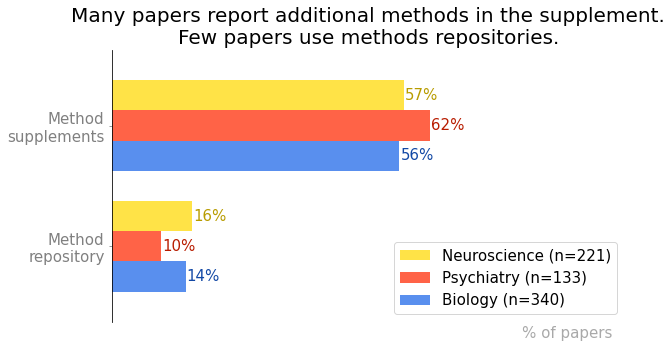

In [749]:

fig, ax = plt.subplots(figsize=(9.2, 5))

labels = ['Method\nrepository','Method\nsupplements']

bar_size = 0.25
padding = 0.25

y_locs = np.arange(len(labels)) * (bar_size * 3 + padding)

supp = bio_df.Methods_supp.value_counts()
supp = supp/supp.sum()*100
repo = bio_df.Methods_repo.value_counts()
repo = repo/repo.sum()*100

bio = [repo.at[1],supp.at[1]]
ax.barh(y_locs, bio , align='edge', height=bar_size, color=Bio_1color, label=f"Biology (n={len(bio_df)})")
for i, v in enumerate(bio):
    plt.text(v + 0.2, y_locs[i]+0.5*padding, "{:2.0f}%".format(v), fontsize=15, color=Bio_7colors[5], va="center")


supp = psych_df.Methods_supp.value_counts()
supp = supp/supp.sum()*100
repo = psych_df.Methods_repo.value_counts()
repo = repo/repo.sum()*100

psych = [repo.at[1],supp.at[1]]
ax.barh(y_locs + bar_size, psych, align='edge', height=bar_size, color=Psych_1color, label=f"Psychiatry (n={len(psych_df)})")
for i, v in enumerate(psych):
    plt.text(v + 0.2, y_locs[i]+bar_size+0.5*padding, "{:2.0f}%".format(v), fontsize=15, color=Psych_7colors[5], va="center")

supp = neuro_df.Methods_supp.value_counts()
supp = supp/supp.sum()*100
repo = neuro_df.Methods_repo.value_counts()
repo = repo/repo.sum()*100

neuro = [repo.at[1],supp.at[1]]
ax.barh(y_locs + 2*bar_size, neuro, align='edge', height=bar_size, color=Neuro_1color, label=f"Neuroscience (n={len(neuro_df)})")
for i, v in enumerate(neuro):
    plt.text(v + 0.2, y_locs[i]+2*bar_size+0.5*padding, "{:2.0f}%".format(v), fontsize=15, color=Neuro_7colors[5], va="center")

ax.set(yticks=y_locs+ bar_size + 0.5*padding, yticklabels=labels, ylim=[0 - padding, len(y_locs)])
ax.set_xlim([0,100])

ax.set_title("Many papers report additional methods in the supplement.\nFew papers use methods repositories.",  fontsize=20)
ax.set_xlabel("% of papers", horizontalalignment='right',x=0.975, fontsize=15, color='darkgrey')
# ax.tick_params(labelsize=15)
ax.set_xticks([])
ax.tick_params(axis='y', labelsize=15, colors='grey')
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['right'].set_visible(False)
# plt.box(on=None)


ax.legend()
handles,labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1],labels[::-1], fontsize=15)


fig.savefig('repos.svg', bbox_inches='tight')

In [673]:
bio_counts = bio_df.loc[:,'Cit1':'Cit442':3].apply(pd.Series.value_counts).sum(axis=1)
bio_total = bio_counts.sum()
bio_perc = bio_counts/bio_total*100
bio_perc = bio_perc.rename(index={13.0: 7.1, 14.0:7.2}).reset_index().replace([1.0,2.0,3.0,4.0],1.0).groupby('index').sum()
bio_perc = bio_perc.reindex([1.0,7.0,7.1,7.2,8.0,9.0,6.0,10.0])

psych_counts = psych_df.loc[:,'Cit2':'Cit120':3].apply(pd.Series.value_counts).sum(axis=1)
psych_total = psych_counts.sum()
psych_perc = psych_counts/psych_total*100
psych_perc = psych_perc.rename(index={13.0: 7.1, 14.0:7.2}).reset_index().replace([1.0,2.0,3.0,4.0],1.0).groupby('index').sum()
psych_perc = psych_perc.reindex([1.0,7.0,7.1,7.2,8.0,9.0,6.0,10.0])

neuro_counts = neuro_df.loc[:,'Cit1_Reason':'Cit53_Reason':3].apply(pd.Series.value_counts).sum(axis=1)
neuro_total = neuro_counts.sum()
neuro_perc = neuro_counts/neuro_total*100
neuro_perc = neuro_perc.rename(index={13.0: 7.1, 14.0:7.2}).reset_index().replace([1.0,2.0,3.0,4.0],1.0).groupby('index').sum()
neuro_perc = neuro_perc.reindex([1.0,7.0,7.1,7.2,8.0,9.0,6.0,10.0])

totals = [neuro_total, psych_total, bio_total]
percs = [neuro_perc, psych_perc, bio_perc]
lefts = np.max(pd.concat(percs,axis=1).to_numpy(),axis=1)
lengths = [len(neuro_df), len(psych_df), len(bio_df)]

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


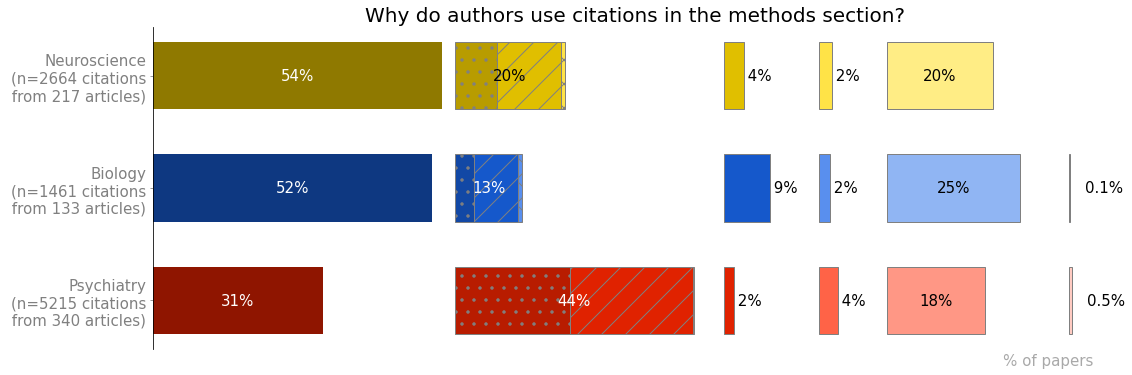

In [760]:
fields = ['Neuroscience', 'Biology', 'Psychiatry']
categories = ['method (1-4)', 'credit (7)', 'software (7.1)', 'atlas (7.2)', 'source (8)', 'formula (9)', 'info (6)', 'other (10)']
num_short_cats = 1

patterns = patterns = ['.', "/" , "x"]
plt.rcParams.update({'hatch.color': 'red'})
    
cmaps = [Neuro_7colors[::-1], Bio_7colors[::-1], Psych_7colors[::-1]]
fig, ax = plt.subplots(figsize=(15.2,5))
for fi,field in enumerate(fields):
    l = 0
    p = 0
    c = -1
    sevens = 0
    ec = None
    gap = 2.5
    va = ha = 'center'
    
    label = f'{field}\n(n={totals[fi]:.0f} citations\n from {lengths[fi]} articles)'
    for i,v in enumerate(percs[fi].values.squeeze()):
        if 7.0 <= percs[fi].index[i] < 8.0 :
            ax.barh(label,v,left=l,height=.6, color=cmaps[fi][1+p],label=categories[i], edgecolor='grey', hatch=patterns[p])
    
            p += 1
            l += v 
            sevens += v
            if percs[fi].index[i]==7.2:
                xcenter = lefts.cumsum()[0] + 2.5 + sevens/2 
                r, g, b,_ = colors.to_rgba(cmaps[fi][1],alpha=None)
                text_color = 'black' if fi < 1 else 'white'
                ax.text(xcenter, fi, f'{sevens:2.0f}%', ha=ha, va=va,
                    color=text_color,fontsize=fontsize)  
            
                l = lefts.cumsum()[i] + i*gap 
                gap = 9
#                 ha = 'left'
        else:
            xcenter = l+v/2 if v > 10 else l+v+2.5
            c += 1 + 1*(i==4)
            ax.barh(label,v,left=l,height=.6, color=cmaps[fi][c],label=categories[i], edgecolor=ec)   
           
            r, g, b,_ = colors.to_rgba(cmaps[fi][c],alpha=None)
            text_color = 'black' if i > 3 else 'white'#*g*b > 0.001 else 'white'
            s = f'{v:2.0f}%' 
            if v < 1:
                s = f'{v:2.1f}%'
                xcenter += 4
            ax.text(xcenter, fi, s, ha=ha, va=va,
                color=text_color,fontsize=fontsize)   
                   
            l += lefts[i]+gap#v[0]
            
        if i == num_short_cats-1:
            ec = 'grey'

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))            
# legend = ax.legend(by_label.values(), by_label.keys(),ncol=len(categories)//2+1, bbox_to_anchor=(0.175, -0.25),
#           loc='lower left', fontsize='small', fancybox=True)


plt.tight_layout()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_title('Why do authors use citations in the methods section?', fontsize=20)
ax.set_xlabel('% of papers', horizontalalignment='right',x=0.975, fontsize=15, color='darkgrey')
ax.set_xticks([])
ax.tick_params(axis='y', labelsize=15, colors='grey')

ax.invert_yaxis()
fig.savefig('categories.png', bbox_inches='tight', dpi=600)

In [491]:
category_data = pd.concat([neuro_perc,psych_perc.set_index('index'),bio_perc.set_index('index')],axis=1)
category_data.columns =fields

In [494]:
print(category_data.to_latex())

\begin{tabular}{lrrr}
\toprule
{} &  Neuroscience &  Psychiatry &    Biology \\
\midrule
1.0  &     50.225225 &   44.421629 &  30.795781 \\
2.0  &      0.187688 &    0.547570 &   0.038351 \\
3.0  &      1.126126 &    3.696099 &   0.345158 \\
4.0  &      2.027027 &    3.148528 &   0.306807 \\
6.0  &     19.819820 &   24.845996 &  18.235858 \\
7.0  &      7.732733 &    3.559206 &  21.303931 \\
7.1  &     12.012012 &    8.145106 &  22.818792 \\
7.2  &      0.600601 &    0.821355 &   0.191755 \\
8.0  &      3.791291 &    8.624230 &   1.840844 \\
9.0  &      2.477477 &    2.053388 &   3.624161 \\
10.0 &           NaN &    0.136893 &   0.498562 \\
\bottomrule
\end{tabular}

